In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, f1_score, roc_curve, roc_auc_score, RocCurveDisplay, auc
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

#Include normalization

def convert(data):
    number = preprocessing.LabelEncoder()
    data['operator'] = number.fit_transform(data.operator)
    data['methodReturn'] = number.fit_transform(data.methodReturn)
    print(data['isKilled'])
    data['isKilled'] = number.fit_transform(data.isKilled)
    print(data['isKilled'])
    return data

# Read in data and display first 5 rows
features = pd.read_csv('training_data.csv',encoding= 'unicode_escape')
#print(features)
#print('The shape of our features is:', features.shape)

#Convert string to float
features=convert(features)
print(features)
print('The shape of our features is:', features.shape) 

# Use numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['isKilled'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('isKilled', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

0          no
1          no
2          no
3          no
4          no
         ... 
591808     no
591809     no
591810     no
591811     no
591812    yes
Name: isKilled, Length: 591813, dtype: object
0         0
1         0
2         0
3         0
4         0
         ..
591808    0
591809    0
591810    0
591811    0
591812    1
Name: isKilled, Length: 591813, dtype: int64
        DepthTree  NumSubclass  McCabe  LOC  DepthNested   CA  CE  \
0               2            0       1    3            1  364  16   
1               2            0       1    3            1  364  16   
2               2            0       1    3            1  364  16   
3               2            0       1    3            1  364  16   
4               2            0       1    3            1  364  16   
...           ...          ...     ...  ...          ...  ...  ..   
591808          3            0       1    3            1    1  11   
591809          2            0       1    3            1    1  11   
59

true label = no = 0 <br>
our label = yes = 1

In [10]:
test = pd.read_csv('testing_data.csv',encoding= 'unicode_escape')

#Convert string to float
test=convert(test)

# ## Labels are the values we want to predict
test_labels = np.array(test['isKilled'])

# # Remove the labels from the features
# # axis 1 refers to the columns
test= test.drop('isKilled', axis = 1)
# # Saving feature names for later use
feature_list = list(test.columns)
# # Convert to numpy array
test = np.array(test)

0         yes
1         yes
2         yes
3         yes
4         yes
         ... 
148487    yes
148488    yes
148489    yes
148490    yes
148491    yes
Name: isKilled, Length: 148492, dtype: object
0         1
1         1
2         1
3         1
4         1
         ..
148487    1
148488    1
148489    1
148490    1
148491    1
Name: isKilled, Length: 148492, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5,random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(295906, 14) (295906,)
(295907, 14) (295907,)


In [12]:
knn = KNeighborsClassifier(n_neighbors=19)

knnPipe = Pipeline(steps=[('model',knn)])
knnPipe.fit(X_train,y_train)

print("********* CROSS VALIDATION *************")
y_pred_train_logreg = knnPipe.predict(X_test)
print(accuracy_score(y_test, y_pred_train_logreg))
print(confusion_matrix(y_test, y_pred_train_logreg))

print("********* TEST *************")
y_pred_test = knnPipe.predict(test)

print(accuracy_score(test_labels, y_pred_test))
confusion = confusion_matrix(test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(test_labels, y_pred_test, average='micro'))
print(f1_score(test_labels, y_pred_test, average='micro'))


********* CROSS VALIDATION *************
0.9415931356811431
[[223590  11526]
 [  5757  55034]]
********* TEST *************
0.821747972954772
Confusion_matrix:
 [[82370 10612]
 [15857 39653]]
(0.821747972954772, 0.821747972954772, 0.821747972954772, None)
0.821747972954772


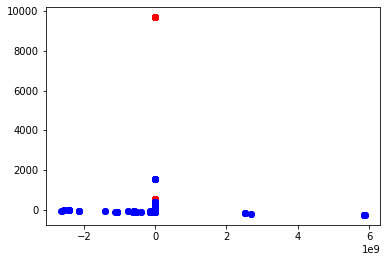

In [5]:

pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(X_train))


plt.scatter(transformed[y_train==0][0], transformed[y_train==0][1], label='No', c='red')
plt.scatter(transformed[y_train==1][0], transformed[y_train==1][1], label='Yes', c='blue')

plt.show()

Finding the best k

In [5]:
max_acc_train = 0
max_acc_test = 0
train_k = 0
test_k = 0

for neighbors in range(5,50):

    knn = KNeighborsClassifier(n_neighbors=neighbors)

    knnPipe = Pipeline(steps=[('model',knn)])
    knnPipe.fit(X_train,y_train)


    y_pred_train_logreg = knnPipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred_train_logreg)
    if acc > max_acc_train:
        max_acc_train = acc
        train_k = neighbors


    y_pred_test = knnPipe.predict(test)
    acc = accuracy_score(test_labels, y_pred_test) 
    if acc > max_acc_test:
        max_acc_test = acc
        test_k = neighbors

print("*******TRAIN********")
print(train_k)
print(max_acc_train)

print("*******TEST*********")
print(test_k)
print(max_acc_test)

*******TRAIN********
5
0.9473111484351502
*******TEST*********
19
0.821747972954772


In [15]:
from sklearn import preprocessing
knn = KNeighborsClassifier(n_neighbors=19, weights='distance', metric='minkowski', p=15)

normalizer = preprocessing.Normalizer()
knnPipe = Pipeline(steps=[('normalization',normalizer),('model',knn)])

knnPipe.fit(X_train,y_train)

print("********* CROSS VALIDATION *************")
y_pred_train_logreg = knnPipe.predict(X_test)
print(accuracy_score(y_test, y_pred_train_logreg))
print(confusion_matrix(y_test, y_pred_train_logreg))

print("********* TEST *************")
y_pred_test = knnPipe.predict(test)

print(accuracy_score(test_labels, y_pred_test))
confusion = confusion_matrix(test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(test_labels, y_pred_test, average='micro'))
print(f1_score(test_labels, y_pred_test, average='micro'))
   

********* CROSS VALIDATION *************
0.9480546252707777
[[226271   8845]
 [  6526  54265]]
********* TEST *************
0.8197680683134445
Confusion_matrix:
 [[82119 10863]
 [15900 39610]]
(0.8197680683134445, 0.8197680683134445, 0.8197680683134445, None)
0.8197680683134445


In [20]:
from sklearn import preprocessing
knn = KNeighborsClassifier(n_neighbors=19, weights='distance')

normalizer = preprocessing.Normalizer()

knnPipe = Pipeline(steps=[('normalization',normalizer),('model',knn)])

knnPipe.fit(X_train,y_train)

print("********* CROSS VALIDATION *************")
y_pred_train_logreg = knnPipe.predict(X_test)
print(accuracy_score(y_test, y_pred_train_logreg))
print(confusion_matrix(y_test, y_pred_train_logreg))

print("********* TEST *************")
y_pred_test = knnPipe.predict(test)

print(accuracy_score(test_labels, y_pred_test))
confusion = confusion_matrix(test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)
print(precision_recall_fscore_support(test_labels, y_pred_test, average='micro'))
print(f1_score(test_labels, y_pred_test, average='micro'))
   

********* CROSS VALIDATION *************
0.9495990294247855
[[226743   8373]
 [  6541  54250]]
********* TEST *************
0.8308326374484821
Confusion_matrix:
 [[83907  9075]
 [16045 39465]]
(0.8308326374484821, 0.8308326374484821, 0.8308326374484821, None)
0.8308326374484821
